## Highway paths - Are players biased?

What paths do Wikispeedia players most follow? Are there "highway paths" that are very often used between 2 countries?

We want to focus on intermediate paths between articles, not only on first and last articles of a game path to gain insight on players behaviours.

Method
- Extract each game path from paths_finished.csv and paths_unfinished.csv as a list
- Create a new list with every 1-unit long path between articles (returns to previous articles '<' should be removed!)
- Convert the list of pairs into a Pandas DataFrame and counts the number of time that each pair appear using .value_counts()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.some_dataloader import *

## Load the data

In [ ]:
country_occurences = pd.read_csv("data/country_occurences.csv")
country_occurences.head()

,Unnamed: 0,Top_1_name,Top_2_name,Top_1_count,Top_2_count
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Ireland,Isle of Man,8.0,4.0
1,%C3%85land,Finland,Åland Islands,36.0,16.0
2,%C3%89douard_Manet,Italy,France,2.0,2.0
3,%C3%89ire,Ireland,Canada,43.0,4.0
4,%C3%93engus_I_of_the_Picts,Ireland,NaN,9.0,NaN


In [ ]:
finished_paths = load_path_finished_dataframe()
finished_paths_divided = finished_paths["path"].apply(lambda row: row.split(';'))

unfinished_paths = load_path_unfinished_distance_dataframe()
unfinished_paths_divided = unfinished_paths["path"].apply(lambda row: row.split(';'))

paths = pd.concat([finished_paths["path"], unfinished_paths["path"]])
paths_merged = paths.apply(lambda row: row.split(';'))

#tests pour accéder aux éléments
# first line
#print(paths_merged.iloc[0])
# first element of first line
#print(paths_merged.iloc[0][0])
# last element of first line
#print(paths_merged.iloc[0][-1])

## Focus on finished paths

In [ ]:
all_pairs_finished = []

# itérer sur toutes les lignes de finished_paths
for i in range(len(finished_paths_divided)): 
    # preprocess to get rid of "<" and not loose path information > [a, b, <, c] becomes [a, c]
    new_row = []

    for j in range(len(finished_paths_divided.iloc[i])):
        if finished_paths_divided.iloc[i][j] != '<': 
            new_row.append(finished_paths_divided.iloc[i][j])

        else :
            new_row.pop()
    new_row = pd.Series(new_row)


    # For each row with a path [a,b,c,d], we create a list of [(a,b), (b,c), (c,d)]
    pairs_row = [(new_row.iloc[j], new_row.iloc[j+1]) for j in range(len(new_row) - 1)]


    # Pairs found for each rows are combined in a unique list
    all_pairs_finished = all_pairs_finished + pairs_row

In [ ]:
# groupeby et sum sur le nombre d'occurences
all_pairs_finished_df = pd.DataFrame({'1-unit long path': all_pairs_finished})
all_pairs_finished_df.value_counts()



1-unit long path                               
(Communication, Telephone)                         536
(North_America, United_States)                     487
(Animal, Mammal)                                   483
(United_States, President_of_the_United_States)    473
(Lion, Zebra)                                      472
                                                  ... 
(Zimbabwe, Copper)                                   1
(Zimbabwe, Democratic_Republic_of_the_Congo)         1
(Zheng_He, Giraffe)                                  1
(Ziad_Jarrah, Germany)                               1
(Zimbabwe, 10th_century)                             1
Name: count, Length: 49717, dtype: int64

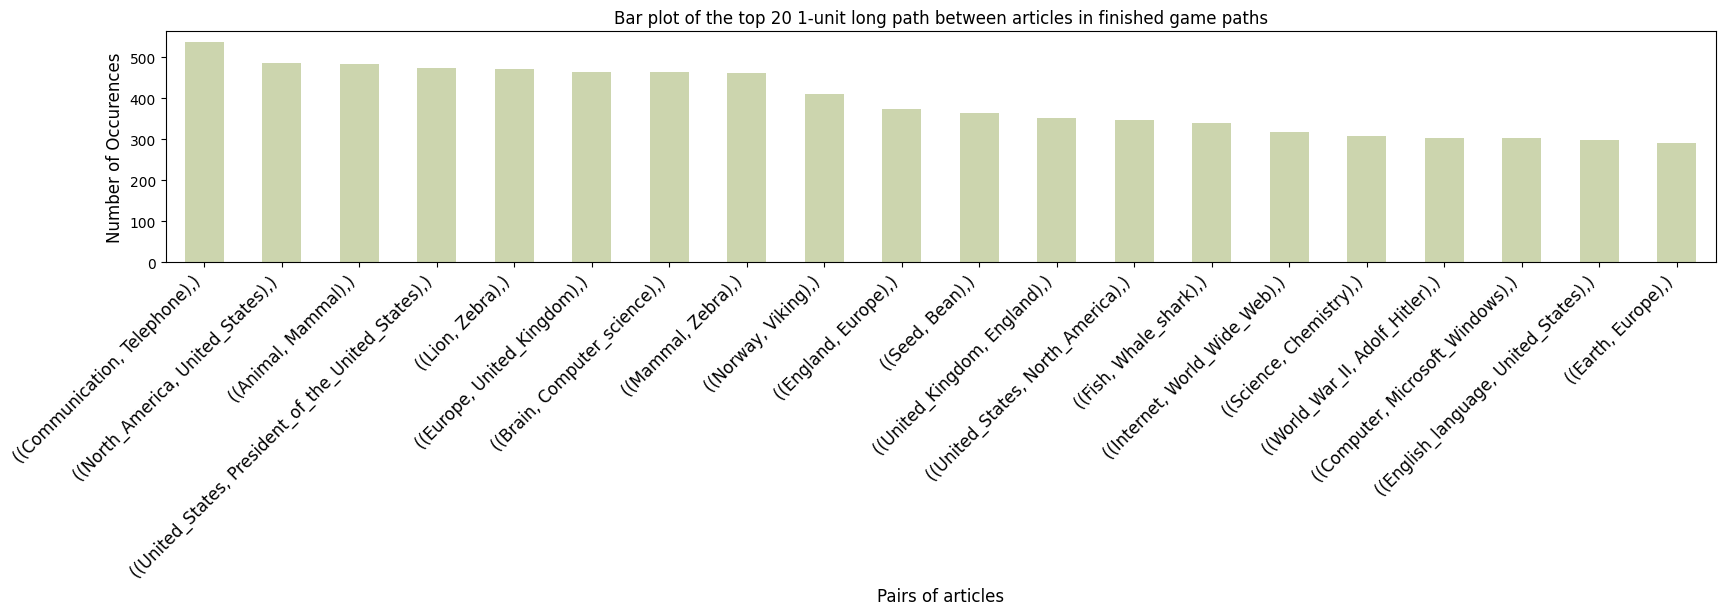

In [ ]:
# Barplot of the top 20 pairs 

top20_finished = all_pairs_finished_df.value_counts().head(20)

plt.figure(figsize=(20, 3))
top20_finished.plot(kind='bar', width= 0.5, color='#ccd5ae')
plt.title('Bar plot of the top 20 1-unit long path between articles in finished game paths', fontsize=12)
plt.xlabel('Pairs of articles', fontsize=12)
plt.ylabel('Number of Occurences', fontsize=12)
plt.xticks(rotation=45,ha='right',fontsize=12)
plt.show()

## Focus on unfinished paths

In [ ]:
all_pairs_unfinished = []

# itérer sur toutes les lignes de finished_paths
for i in range(len(unfinished_paths_divided)): 
    # preprocess to get rid of "<" and not loose path information > [a, b, <, c] becomes [a, c]
    new_row = []

    for j in range(len(unfinished_paths_divided.iloc[i])):
        if unfinished_paths_divided.iloc[i][j] != '<': 
            new_row.append(unfinished_paths_divided.iloc[i][j])

        else :
            new_row.pop()
    new_row = pd.Series(new_row)


    # For each row with a path [a,b,c,d], we create a list of [(a,b), (b,c), (c,d)]
    pairs_row = [(new_row.iloc[j], new_row.iloc[j+1]) for j in range(len(new_row) - 1)]


    # Pairs found for each rows are combined in a unique list
    all_pairs_unfinished = all_pairs_unfinished + pairs_row

In [ ]:
# groupeby et sum sur le nombre d'occurences
all_pairs_unfinished_df = pd.DataFrame({'1-unit long path': all_pairs_unfinished})
all_pairs_unfinished_df.value_counts()


1-unit long path                     
(Pyramid, Mexico)                        275
(Brain, Computer_science)                218
(Animal, Mammal)                         169
(North_America, United_States)           164
(Europe, United_Kingdom)                 136
                                        ... 
(French_language, Senegal)                 1
(14th_century, Buddha)                     1
(French_language, Spain)                   1
(14th_century, Christianity)               1
(%C3%89douard_Manet, Edgar_Allan_Poe)      1
Name: count, Length: 29305, dtype: int64

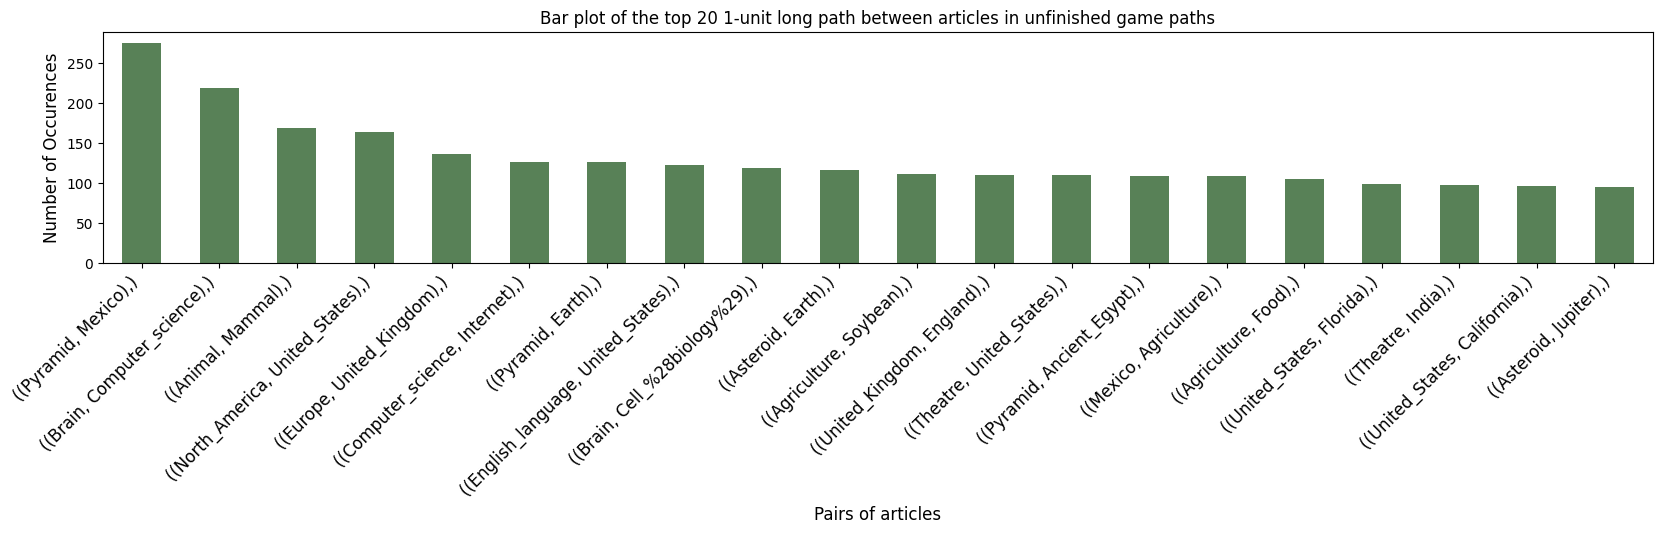

In [ ]:
# # Barplot of the top 20 pairs 
top20_unfinished = all_pairs_unfinished_df.value_counts().head(20)

plt.figure(figsize=(20, 3))
top20_unfinished.plot(kind='bar', width= 0.5, color='#588157')
plt.title('Bar plot of the top 20 1-unit long path between articles in unfinished game paths', fontsize=12)
plt.xlabel('Pairs of articles', fontsize=12)
plt.ylabel('Number of Occurences', fontsize=12)
plt.xticks(rotation=45,ha='right',fontsize=12)
plt.show()


## Combine finished and unfinished paths 

In [ ]:
all_pairs_merged = pd.concat([all_pairs_finished_df, all_pairs_unfinished_df])
all_pairs_merged.value_counts()

1-unit long path              
(Brain, Computer_science)         681
(Animal, Mammal)                  652
(North_America, United_States)    651
(Europe, United_Kingdom)          600
(Communication, Telephone)        539
                                 ... 
(10th_century, Myanmar)             1
(Zionism, Sea_of_Galilee)           1
(Zionism, Soviet_Union)             1
(Zionism, United_Kingdom)           1
(Zionism, United_States)            1
Name: count, Length: 56709, dtype: int64

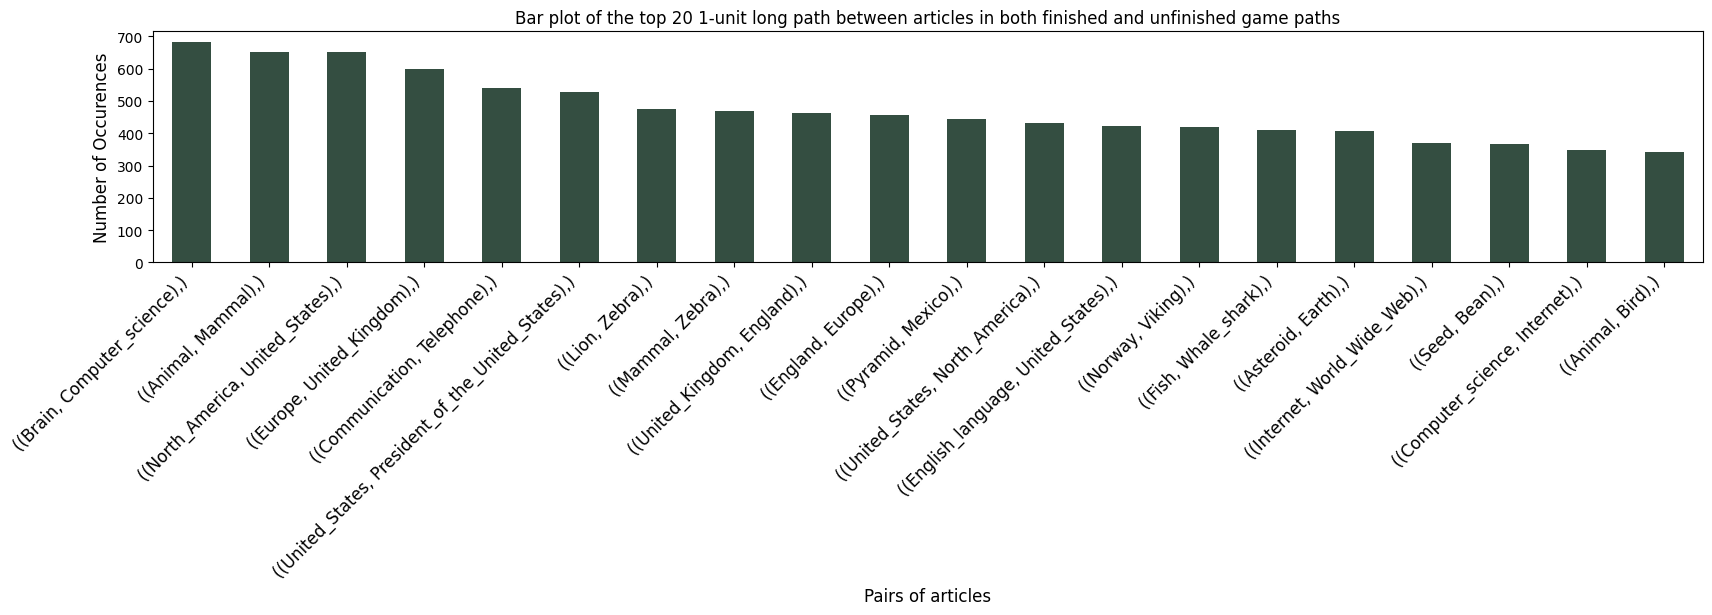

In [ ]:
# Barplot of the top 20 pairs 
top20_merged = all_pairs_merged.value_counts().head(20)

plt.figure(figsize=(20, 3))
top20_merged.plot(kind='bar', width= 0.5, color='#344e41')
plt.title('Bar plot of the top 20 1-unit long path between articles in both finished and unfinished game paths', fontsize=12)
plt.xlabel('Pairs of articles', fontsize=12)
plt.ylabel('Number of Occurences', fontsize=12)
plt.xticks(rotation=45,ha='right',fontsize=12)
plt.show()

## Associate articles to their country

In [ ]:
# Divide pairs into 2 columns 'From' and 'To'

# Merge once with country_occurences.csv?

## Visualization of highway paths on a map

In [ ]:
# Plotly express has a function px.line_geo

## Test for 2-unit long paths

In [ ]:
all_trios_finished = []

# itérer sur toutes les lignes de finished_paths
for i in range(len(paths_merged)): 
    # preprocess to get rid of "<" and not loose path information > [a, b, <, c] becomes [a, c]
    new_row = []

    for j in range(len(paths_merged.iloc[i])):
        if paths_merged.iloc[i][j] != '<': 
            new_row.append(paths_merged.iloc[i][j])

        else :
            new_row.pop()
    new_row = pd.Series(new_row)


    # For each row with a path [a,b,c,d], we create a list of [(a,b, c), (b,c, d)]
    trios_row = [(new_row.iloc[j], new_row.iloc[j+1], new_row.iloc[j+2]) for j in range(len(new_row) - 2)]


    # Trios found for each rows are combined in a unique list
    all_trios_finished = all_trios_finished + trios_row

In [ ]:
# groupeby et sum sur le nombre d'occurences
all_trios_finished_df = pd.DataFrame({'2-unit long path': all_trios_finished})
all_trios_finished_df.value_counts()


2-unit long path                              
(Fish, Whale_shark, Shark)                        322
(Brain, Computer_science, Internet)               278
(Information, Communication, Telephone)           245
(Animal, Mammal, Zebra)                           237
(Film, Animation, The_Lion_King)                  195
                                                 ... 
(10th_century, Byzantine_Empire, Heraclius)         1
(10th_century, Byzantine_Empire, Iraq)              1
(10th_century, Byzantine_Empire, Roman_Empire)      1
(10th_century, Dark_Ages, 15th_century)             1
(%C3%85land, Baltic_Sea, Atlantic_Ocean)            1
Name: count, Length: 158497, dtype: int64

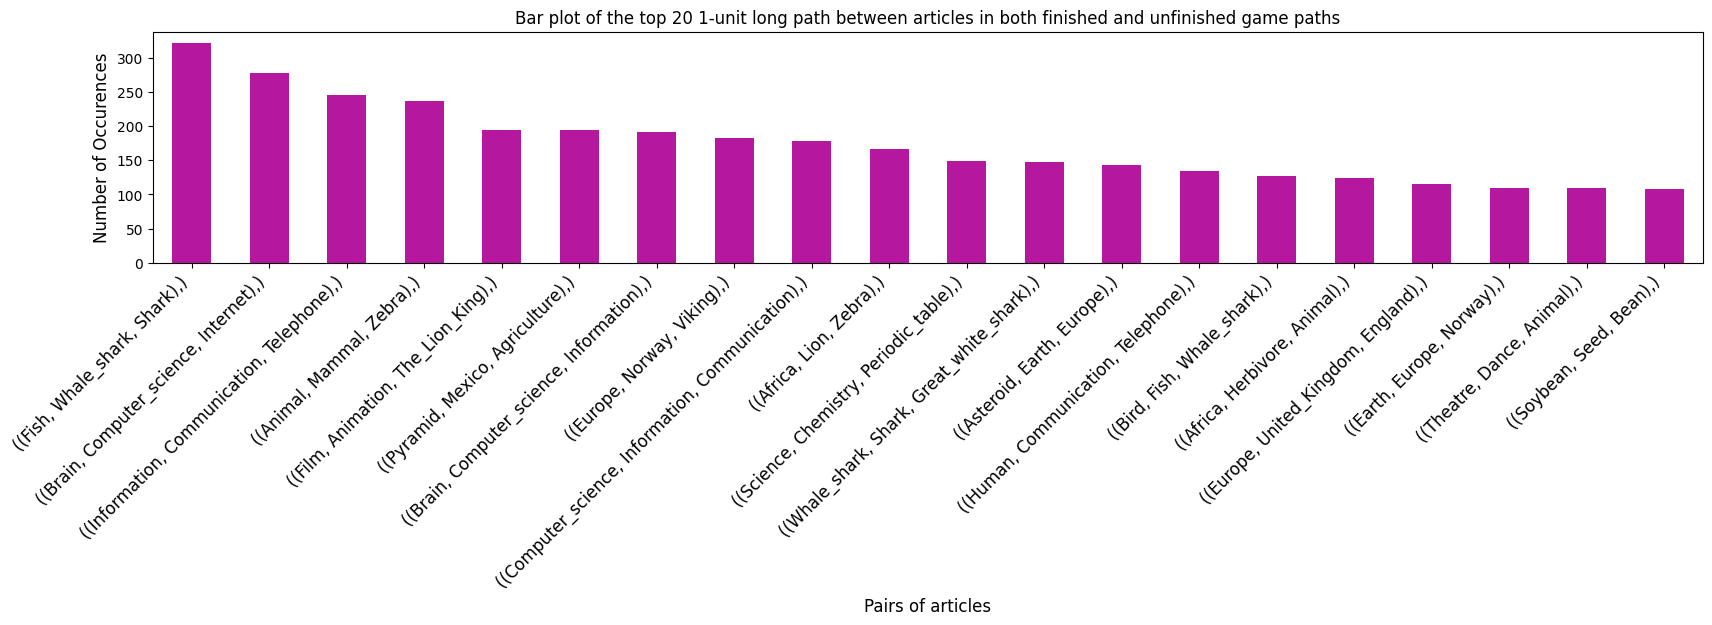

In [ ]:
# Barplot of the top20 trio in both finished and unifinished paths 
# Barplot of the top 20 pairs 
top20_trio_merged = all_trios_finished_df.value_counts().head(20)

plt.figure(figsize=(20, 3))
top20_trio_merged.plot(kind='bar', width= 0.5, color='#b5179e')
plt.title('Bar plot of the top 20 1-unit long path between articles in both finished and unfinished game paths', fontsize=12)
plt.xlabel('Pairs of articles', fontsize=12)
plt.ylabel('Number of Occurences', fontsize=12)
plt.xticks(rotation=45,ha='right',fontsize=12)
plt.show()